In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import numpy as np


def plot_folds(dfs, num_dataset, titel, file_name, out_folder):
    fig, ax2 = plt.subplots(1, 1, figsize=(14, 4))
    colors = ['limegreen', 'orange', 'fuchsia', 'dodgerblue']
    for i, df in enumerate(dfs, 0):
        if num_dataset == 0:
            ax2.plot(df['ds_0_validate'], label='Test Fold ' + str(i), color=colors[i])
        else:
            ax2.plot(df['ds_1_validate'], label='Test Fold ' + str(i), color=colors[i])

    ax2.set_title('Dataset ' + str(num_dataset + 1) + ': ' + titel)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('IOU')
    ax2.set_ylim((0.2, 0.9))
    ax2.legend(loc='upper left')
    ax2.grid(visible=True)
    fig.savefig(os.path.join(out_folder, file_name + '.png'))


def plot_total(df, titel, file_name, out_folder):
    fig, ax2 = plt.subplots(1, 1, figsize=(14, 4))
    ax2.plot(df['combined_validate'], label='Combined', color='red')
    ax2.plot(df['ds_0_validate'], label='Dataset 1', color='blue')
    ax2.plot(df['ds_1_validate'], label='Dataset 2', color='green')
    ax2.set_title('Combined: ' + titel)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('IOU')
    ax2.set_ylim((0.2, 0.9))
    ax2.legend(loc='upper left')
    ax2.grid(visible=True)
    fig.savefig(os.path.join(out_folder, file_name + '.png'))

C:\Users\silva\AppData\Local\Temp\ipykernel_26620\1864494140.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax2 = plt.subplots(1, 1, figsize=(14, 4))


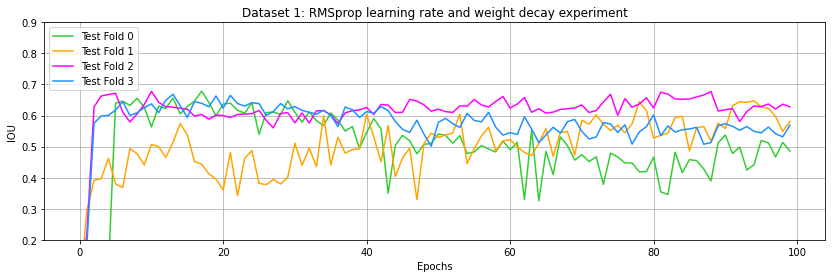

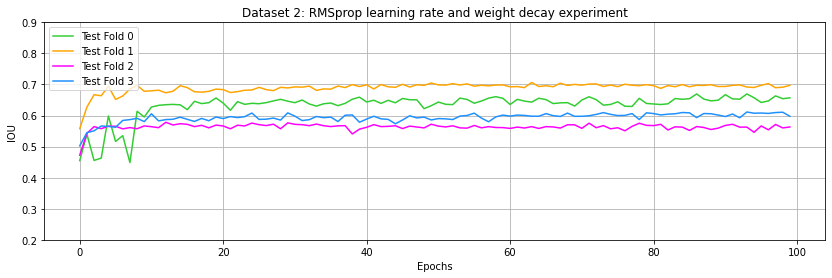

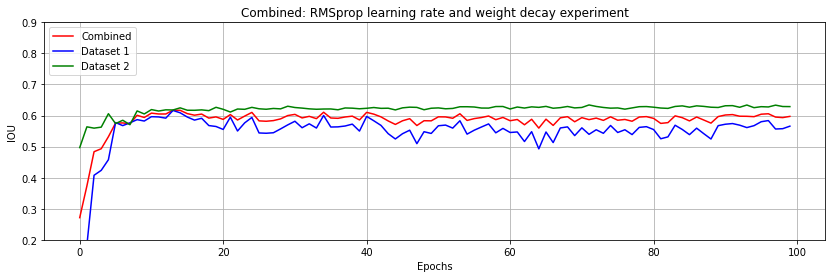

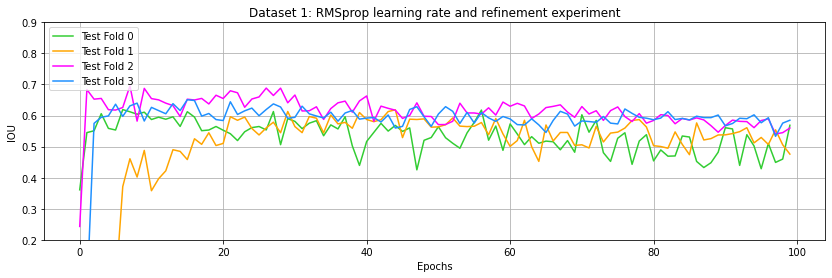

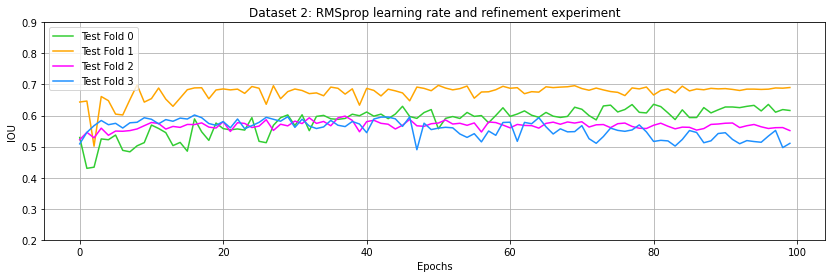

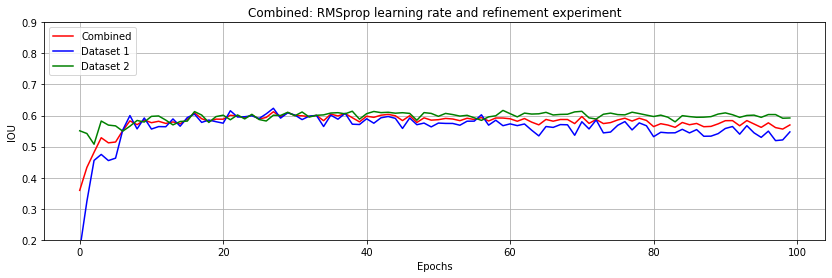

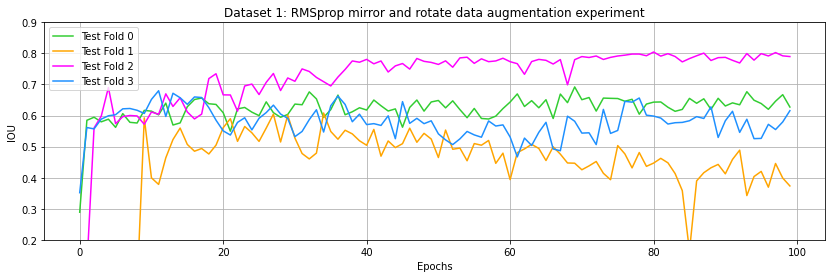

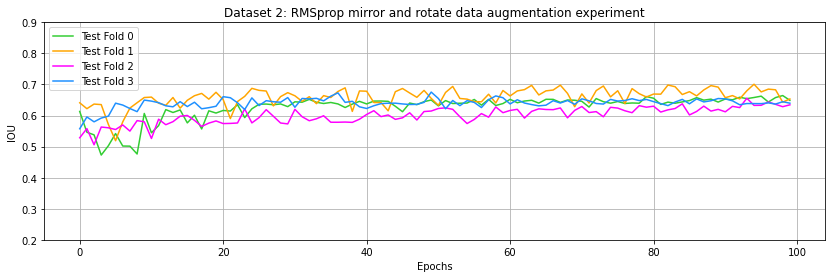

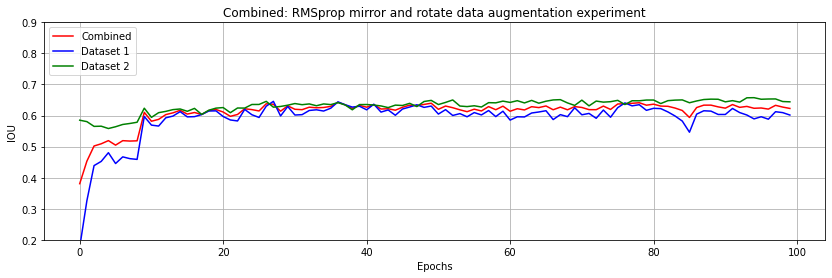

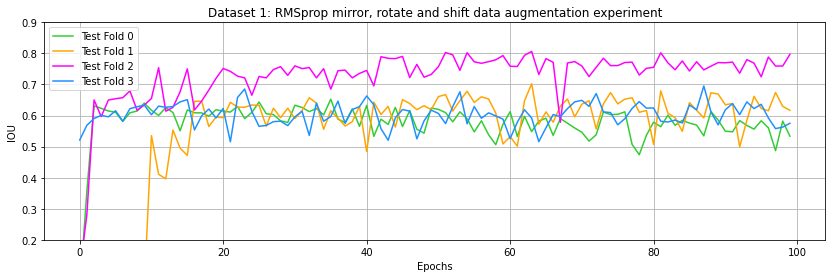

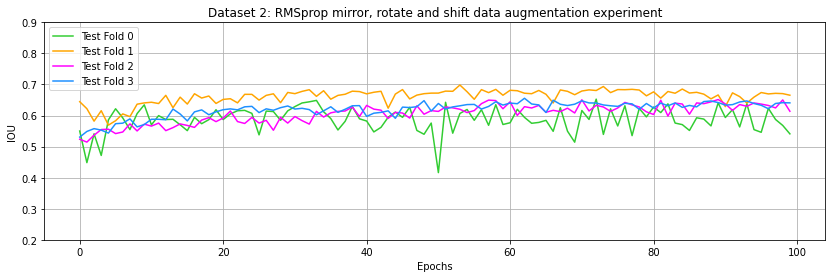

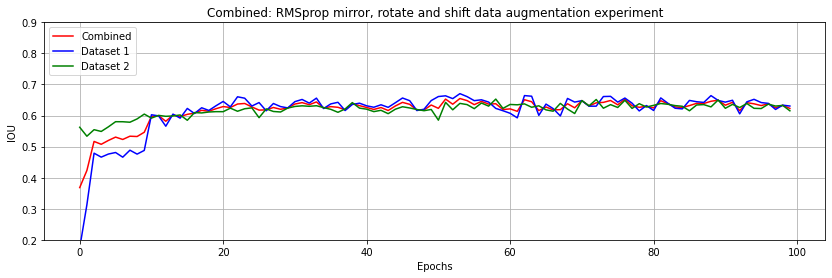

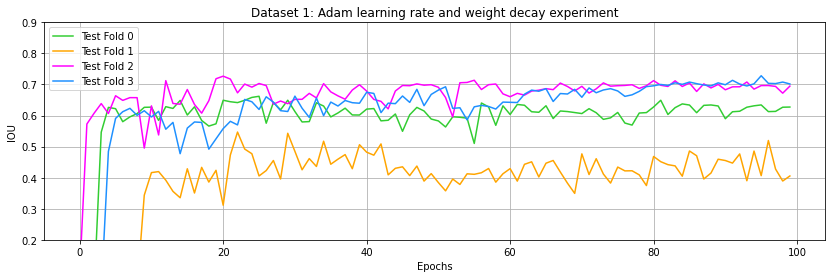

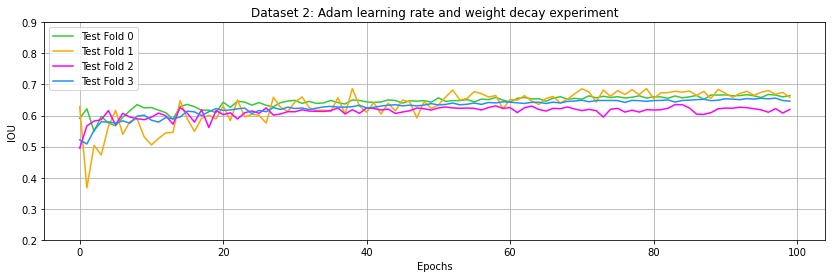

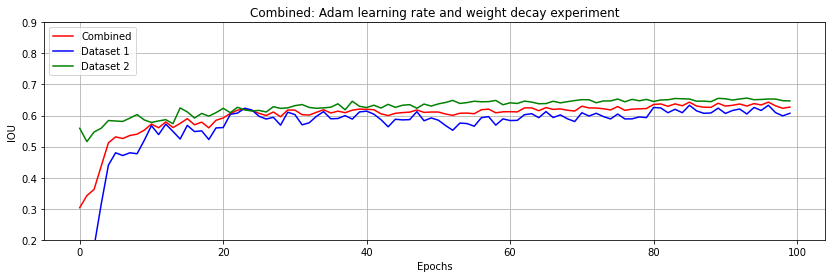

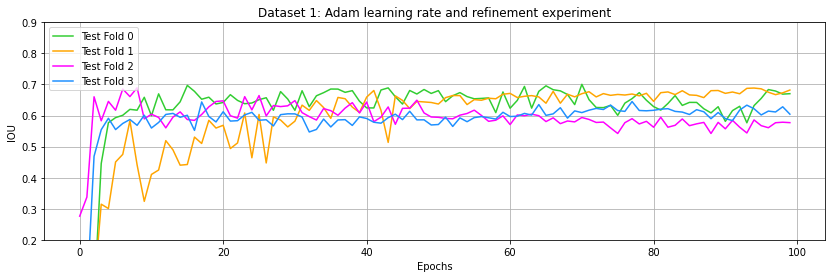

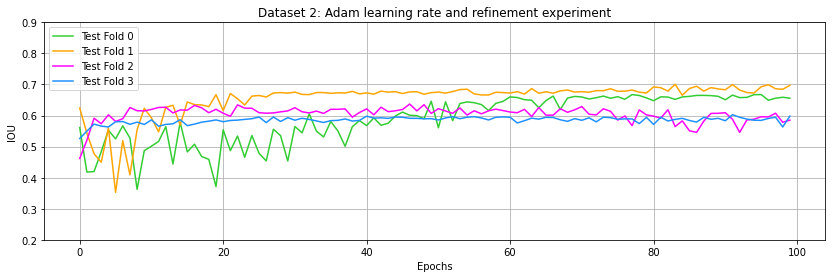

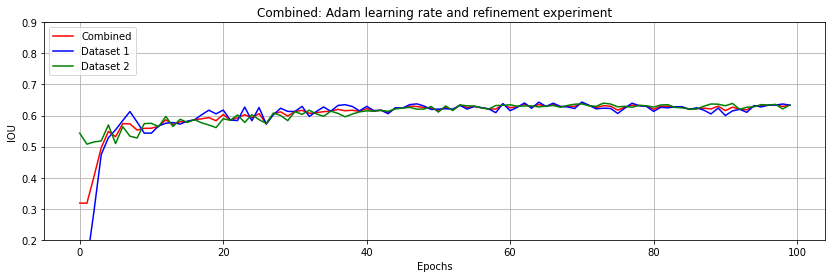

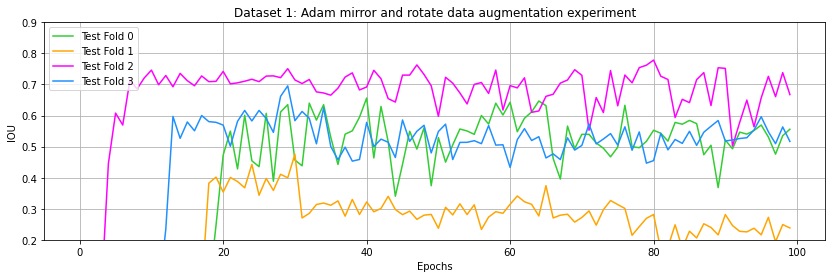

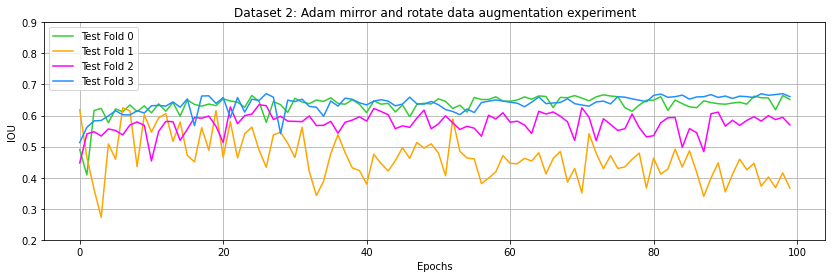

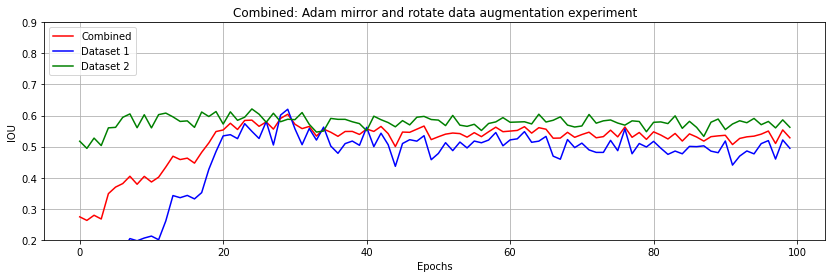

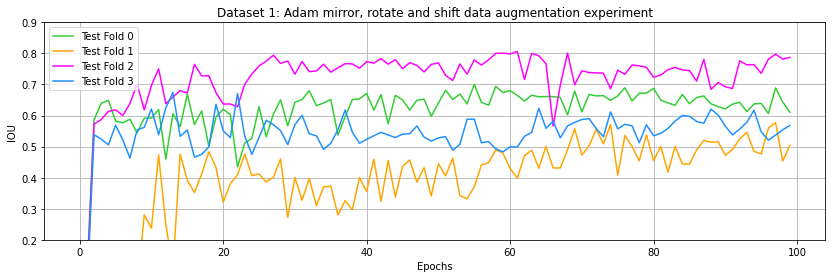

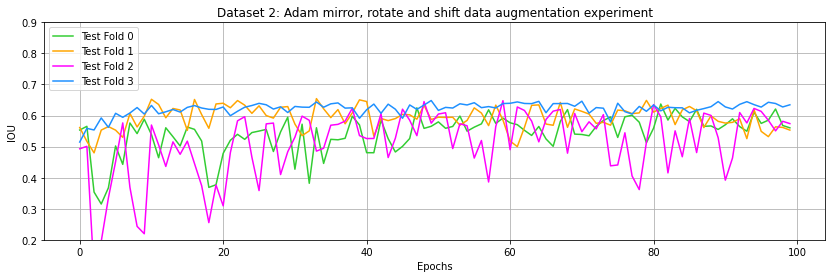

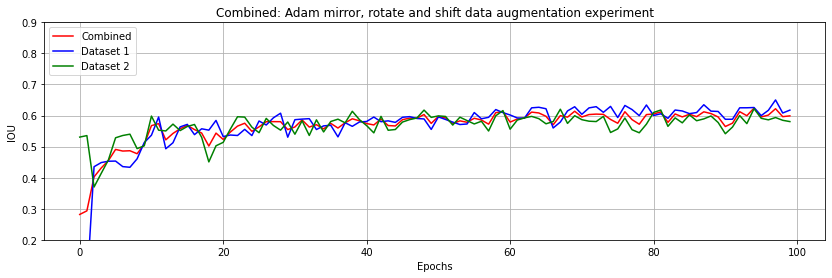

In [40]:
# df_1 = pd.read_csv('./results/adam_mirror_rotate/1_test.csv')
# df_2 = pd.read_csv('./results/adam_mirror_rotate/5_test.csv')
# df_3 = pd.read_csv('./results/adam_mirror_rotate/9_test.csv')
# df_4 = pd.read_csv('./results/adam_mirror_rotate/13_test.csv')

root_folder = './results'
out_folder = './plots'

titels = [
    'learning rate and weight decay',
    'learning rate and refinement',
    'mirror and rotate data augmentation',
    'mirror, rotate and shift data augmentation'
]

df_results = None

for optim in ['rms', 'adam']:
    for exp in [1, 2, 3, 4]:
        folder = optim + '_' + str(exp)
        dfs = []
        folder_path = os.path.join(root_folder, folder)
        final = None
        for fold in [1, 2, 3, 4]:
            df_path = os.path.join(folder_path, str(fold) + '_test.csv')
            df = pd.read_csv(df_path)
            dfs.append(pd.read_csv(df_path))
            if isinstance(final, type(None)):
                final = df
            else:
                final = final.add(df)

        ds0_0 = np.mean(dfs[0]['ds_0_validate'][-10:])
        ds0_1 = np.mean(dfs[1]['ds_0_validate'][-10:])
        ds0_2 = np.mean(dfs[2]['ds_0_validate'][-10:])
        ds0_3 = np.mean(dfs[3]['ds_0_validate'][-10:])
        ds0_avg = (ds0_0 + ds0_1 + ds0_2 + ds0_3) / 4

        ds1_0 = np.mean(dfs[0]['ds_1_validate'][-10:])
        ds1_1 = np.mean(dfs[1]['ds_1_validate'][-10:])
        ds1_2 = np.mean(dfs[2]['ds_1_validate'][-10:])
        ds1_3 = np.mean(dfs[3]['ds_1_validate'][-10:])
        ds1_avg = (ds1_0 + ds1_1 + ds1_2 + ds1_3) / 4
        avg = (ds0_avg + ds1_avg) / 2

        if optim == 'adam':
            titel = 'Adam'
        else:
            titel = 'RMSprop'



        current_results = pd.DataFrame(pd.DataFrame(
                [[titel, exp, ds0_0, ds0_1, ds0_2, ds0_3, ds0_avg, ds1_0, ds1_1, ds1_2, ds1_3, ds1_avg, avg]],
                columns=['optim', 'exp', 'ds0_0', 'ds0_1', 'ds0_2', 'ds0_3', 'ds0_avg', 'ds1_0', 'ds1_1', 'ds1_2', 'ds1_3', 'ds1_avg', 'avg']))

        if isinstance(df_results, type(None)):  #ds_0_train,ds_0_validate,ds_1_train,ds_1_validate,combined_train,combined_validate
            df_results = current_results
        else:
            df_results = pd.concat([df_results, current_results])
        final = final.div(4)

        titel = titel + ' ' + titels[exp - 1] + ' experiment'

        plot_folds(dfs, 0, titel, optim + '_ds1_exp' + str(exp), out_folder)
        plot_folds(dfs, 1, titel, optim + '_ds2_exp' + str(exp), out_folder)
        plot_total(final, titel, optim + '_total_exp' + str(exp), out_folder)


df_results_rounded = df_results.round(2)
df_results.to_csv(os.path.join(out_folder, 'total_results.csv'), index=False)
df_results_rounded.to_csv(os.path.join(out_folder, 'total_results_rounded.csv'), index=False)